In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report,accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
base_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
base_df.shape

(5000, 14)

In [3]:
base_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#rearranging columns
base_df = base_df[['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage','Securities Account',
       'CD Account', 'Online', 'CreditCard','Personal Loan']]

In [5]:
base_df.info()
#we have no null values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Personal Loan         5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
base_df.describe()
#minimum experience can not be negative

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [7]:
df = base_df.copy()

In [9]:
#minimum Experience can not be negative.
print('Total count of negative experience = ',len(df[df['Experience']<0]))
index_list = df[df['Experience']<0].index.to_list()
df[df['Experience']<0]

Total count of negative experience =  52


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,1,0
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,1,0,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,1,0,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,1,0,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,1,0,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,1,0,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,1,0
583,584,24,-1,38,95045,2,1.70,2,0,0,0,1,0,0
597,598,24,-2,125,92835,2,7.20,1,0,1,0,0,1,0


In [10]:
#replacing negative experience with zero
for index in index_list:
    df.loc[index, 'Experience'] = 0

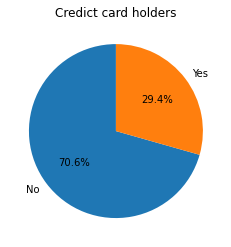

In [48]:
#percentage distribution
x = df['CreditCard'].value_counts()
plt.title('Credict card holders')
plt.pie(x,startangle=90,autopct='%1.1f%%',labels=['No','Yes'])
plt.show()

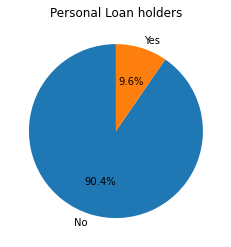

In [49]:
x = df['Personal Loan'].value_counts()
plt.title('Personal Loan holders')
plt.pie(x,startangle=90,autopct='%1.1f%%',labels=['No','Yes'])
plt.show()

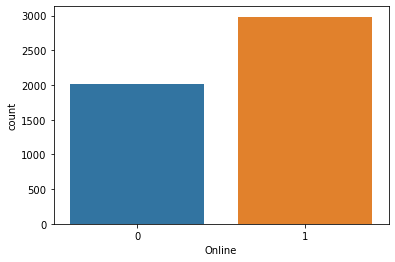

In [50]:
sns.countplot('Online',data=base_df)

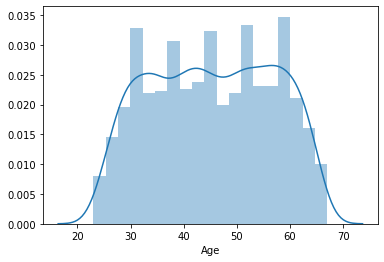

Age : -0.029331878574766698
-----------------------------------------------


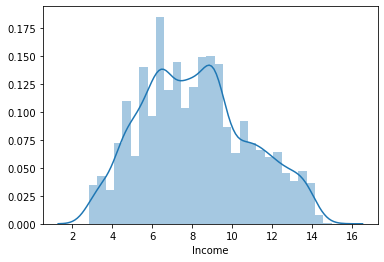

Income : 0.26035759523724794
-----------------------------------------------


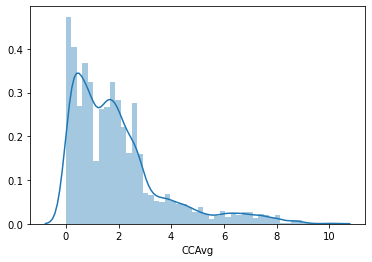

CCAvg : 1.5979637637001873
-----------------------------------------------


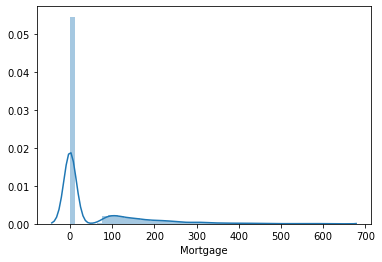

Mortgage : 2.103371065804789
-----------------------------------------------


In [33]:
#Checking skewness
from scipy.stats import skew

columns_list = ['Age','Income','CCAvg','Mortgage']

for col in columns_list:
    plt.figure()
    sns.distplot(sampling_df[col])
    plt.show()
    
    print(col,":",skew(sampling_df[col]))
    print("-----------------------------------------------")
    
#Applying skewness doesn't change results as much

In [11]:
#dropping ID, ZIP Code
df = df.drop(['ID','ZIP Code'],axis=1)

In [34]:
#Developing basic model without sampling the dataset 
#Checking results for 3 models

X = df.drop('Personal Loan',axis=1)
Y = df['Personal Loan']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=1)

models = {
    LogisticRegression():'Logistic Regression',
    DecisionTreeClassifier():'Decision Tree',
    RandomForestClassifier():'Random Forest Classifier'
}

def model_score(model):
    print(models[model])
    model.fit(x_train, y_train)
    print('Training score:',model.score(x_train, y_train))
    y_pred = model.predict(x_test)
    print('Accuracy score:',accuracy_score(y_test,y_pred))
    print('Classification report: \n',classification_report(y_test,y_pred))
    print()
    print('------------------------------------')
    return model


for model in models:
    model_score(model)

Logistic Regression
Training score: 0.9505714285714286
Accuracy score: 0.944
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.83      0.55      0.66       149

    accuracy                           0.94      1500
   macro avg       0.89      0.77      0.82      1500
weighted avg       0.94      0.94      0.94      1500


------------------------------------
Decision Tree
Training score: 1.0
Accuracy score: 0.9793333333333333
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.91      0.88      0.89       149

    accuracy                           0.98      1500
   macro avg       0.95      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500


------------------------------------
Random Forest Classifier
Training score: 1.0
Accuracy score: 0.98066666666

In [54]:
'''
Developing model with Oversampling technique
'''
sampling_df = base_df.copy()

sampling_df = sampling_df.drop(['ID','ZIP Code'],axis=1)


X = df.drop(['Personal Loan','Securities Account' ],axis=1)
Y = df['Personal Loan']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=1)


from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=10)
x_train_samples, y_train_samples = smote.fit_sample(x_train, y_train)

def model_score(model):
    print(models[model])
    model.fit(x_train_samples, y_train_samples)
    print('Training score:',model.score(x_train_samples, y_train_samples))
    y_pred = model.predict(x_test)
    print('Accuracy score:',accuracy_score(y_test,y_pred))
    print('Classification report: \n',classification_report(y_test,y_pred))
    print()
    print('------------------------------------')
    return model

models = {
    LogisticRegression():'Logistic Regression',
    DecisionTreeClassifier():'Decision Tree',
    RandomForestClassifier():'Random Forest Classifier'
}


for model in models:
    model_score(model)


Logistic Regression
Training score: 0.9015462290943516
Accuracy score: 0.9026666666666666
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.91      0.94      1351
           1       0.51      0.88      0.64       149

    accuracy                           0.90      1500
   macro avg       0.75      0.89      0.79      1500
weighted avg       0.94      0.90      0.91      1500


------------------------------------
Decision Tree
Training score: 1.0
Accuracy score: 0.9773333333333334
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.90      0.87      0.88       149

    accuracy                           0.98      1500
   macro avg       0.94      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500


------------------------------------
Random Forest Classifier
Training score: 1.0
Accuracy score: 

In [ ]:
#The suitable model is using Oversampling with Logistic regression.
#As we are getting Training score,accuracy, recall score almost ~0.88 to 0.90.